# Lab 4.1: Atmosphere & GHG

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from oscar import OSCAR

%matplotlib inline

<div class="alert alert-info"><h1>Exercise 1: Atmospheric Lifetime of Well Mixed Greenhouse Gases</h1></div>

1. Run a simulation until 2300 with no emissions past year 2010. Note: this is easily done by running with the default `OSCAR` configuration (which stops emissions in 2010).

In [2]:
enddate = 2300
results = OSCAR().run(enddate) # By default OSCAR runs with emissions stopping in 2010

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


<ol start="2">
    <li>Plot the time series of the atmospheric concentrations of CO2, CH4 and N2O.  Note the differences in units (refer to the [OSCAR documentation online](http://www.princeton.edu/~skclark/oscar/outputs.html#greenhouse-gas-concentrations)).</li>
</ol>

//anaconda/envs/oscar-dev/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


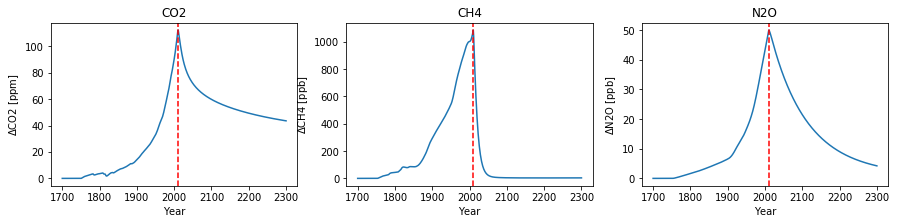

In [3]:
year = 1700 + np.arange(len(results['D_CO2']))

## Figure with 3 subplots
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(15, 3)

# plot change in atm CO2
axes[0].plot(year, results['D_CO2'])
axes[0].set_title('CO2')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('$\mathregular{\Delta}$CO2 [ppm]')
plt.gca().legend(loc='upper left')
axes[0].axvline(2010, color='red', ls='--')

# plot change in atm Ch4
axes[1].plot(year, results['D_CH4'])
axes[1].set_title('CH4')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('$\mathregular{\Delta}$CH4 [ppb]')
axes[1].axvline(2010, color='red', ls='--')

# plot change in atm N2O
axes[2].plot(year, results['D_N2O'])
axes[2].set_title('N2O')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('$\mathregular{\Delta}$N2O [ppb]')
axes[2].axvline(2010, color='red', ls='--')

<ol start="3">
    <li>Plot the evolution of the 3 compounds normalised to their maximal concentrations (i.e. concentration / max concentration). How do the three compounds evolve after emissions have stopped?</li>
    <li>From this figure, estimate the lifetimes $\tau$ of the three compounds. The lifetime of a greenhouse gas refers to the approximate amount of time it would take for the concentration to drop to 1/e times the concentration when emissions stopped (e = 2.71828, 1/e ~ 0.37). This occurs as a result of either being converted to another chemical compound or being taken out of the atmosphere via a sink.  Hint: set your x-axis bounds such that the left-most point is for the year emissions stopped (2010) and the right-most point is for the final year of the simulation (2300) (recall [`ax.set_xlim`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlim.html#matplotlib-axes-axes-set-xlim)).  Then overplot a horizontal line representing the fraction 1/e and find the year at which each curve intersects this horizontal line (use [`ax.axhline`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axhline.html?highlight=axhline#matplotlib-axes-axes-axhline)).</li>
</ol>

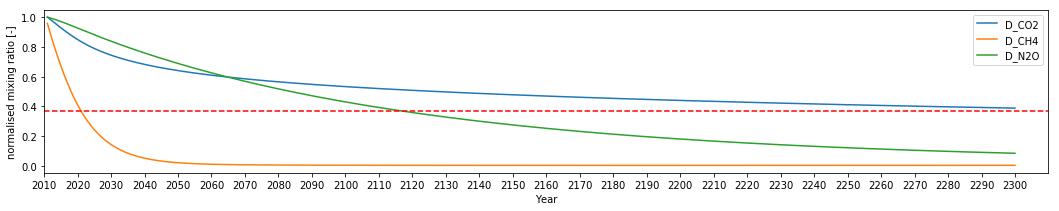

In [5]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 3)

start = 2010
end = 2310
ti = start - 1700 + 1

GHG = ['D_CO2', 'D_CH4', 'D_N2O']
for comp in GHG:
    normalized = results[comp] / np.max(results[comp])
    ax.plot(year[ti:], normalized[ti:], label=comp)

ax.set_xlabel('Year')
ax.set_ylabel('normalised mixing ratio [-]')
ax.legend(loc='upper right')
ax.axhline(1 / np.e, color='red', ls='--')
ax.set_xlim([start, end])
ax.set_xticks(np.arange(start, end, 10));

Class discussion on global warming potential and atmospheric lifetime?